In [1]:
import sys
sys.argv = sys.argv + ['--config', '/home/zhihua/framework/deepspace/configs/toml/bone/gan3d_test.toml']

In [2]:
from imageio import imwrite
from tqdm import tqdm
from pathlib import Path
import numpy as np
from matplotlib.pyplot import imshow
from pathlib import Path
from deepspace.utils.data import read_numpy, normalization
from commontools.data.image import show_images
from commontools.setup import config

[INFO]:  *************************************** 
[INFO]: The experiment name is gan3d_npy
[INFO]:  *************************************** 
[INFO]:  THE Configuration of your experiment ..
[INFO]: {'deepspace': {'agent': 'deepspace.agents.bone.gan3d.BoneAgent',
               'break_probability': 0.9,
               'break_range': [[0.2, 0.5], [0.2, 0.5], [0.2, 0.5]],
               'checkpoint_file': 'checkpoint.pth.tar',
               'data_format': 'npy',
               'data_loader_workers': 1,
               'device': 'gpu',
               'dis_encoder_sizes': [8, 16, 32],
               'dis_fc_sizes': [64, 1],
               'dis_temporal_strides': [2, 2, 1],
               'gen_encoder_sizes': [8, 16, 32],
               'gen_fc_sizes': [128],
               'gen_temporal_strides': [2, 2, 1],
               'gpu_device': 0,
               'image_channels': 1,
               'image_size': [64, 64, 64],
               'loss_weight': 0.999,
               'max_epoch': 300,
     

In [3]:
def get_input_file_path(recon_path):
    input_path = recon_path.parent / (recon_path.name.replace('recon', 'input'))
    return input_path


def diff_show(input_data, recon_data, index, figsize=None):
    images = [input_data[index, :, :, ], recon_data[index, :, :,], input_data[index, :, :,] - recon_data[index, :, :, ]]
    show_images(images, shape=(3, 1), figsize=figsize)
    

In [4]:
input_data = np.load(config.deepspace.train_data, allow_pickle=True)
print(input_data.shape, input_data.dtype)
recon_data = np.load(config.deepspace.test_output_file, allow_pickle=True)
print(recon_data.shape, recon_data.dtype)
target_data = np.load(config.deepspace.target_data, allow_pickle=True)
print(target_data.shape, recon_data.dtype)

# input_bin_data = normalization(input_bin_data)

(2153, 1120, 1120) float32
(2176, 1152, 1152) float32
(2153, 1120, 1120) float32


In [5]:
recon_data = recon_data[0:input_data.shape[0], 0:input_data.shape[1], 0:input_data.shape[2]]
print(recon_data.shape, recon_data.dtype)


(2153, 1120, 1120) float32


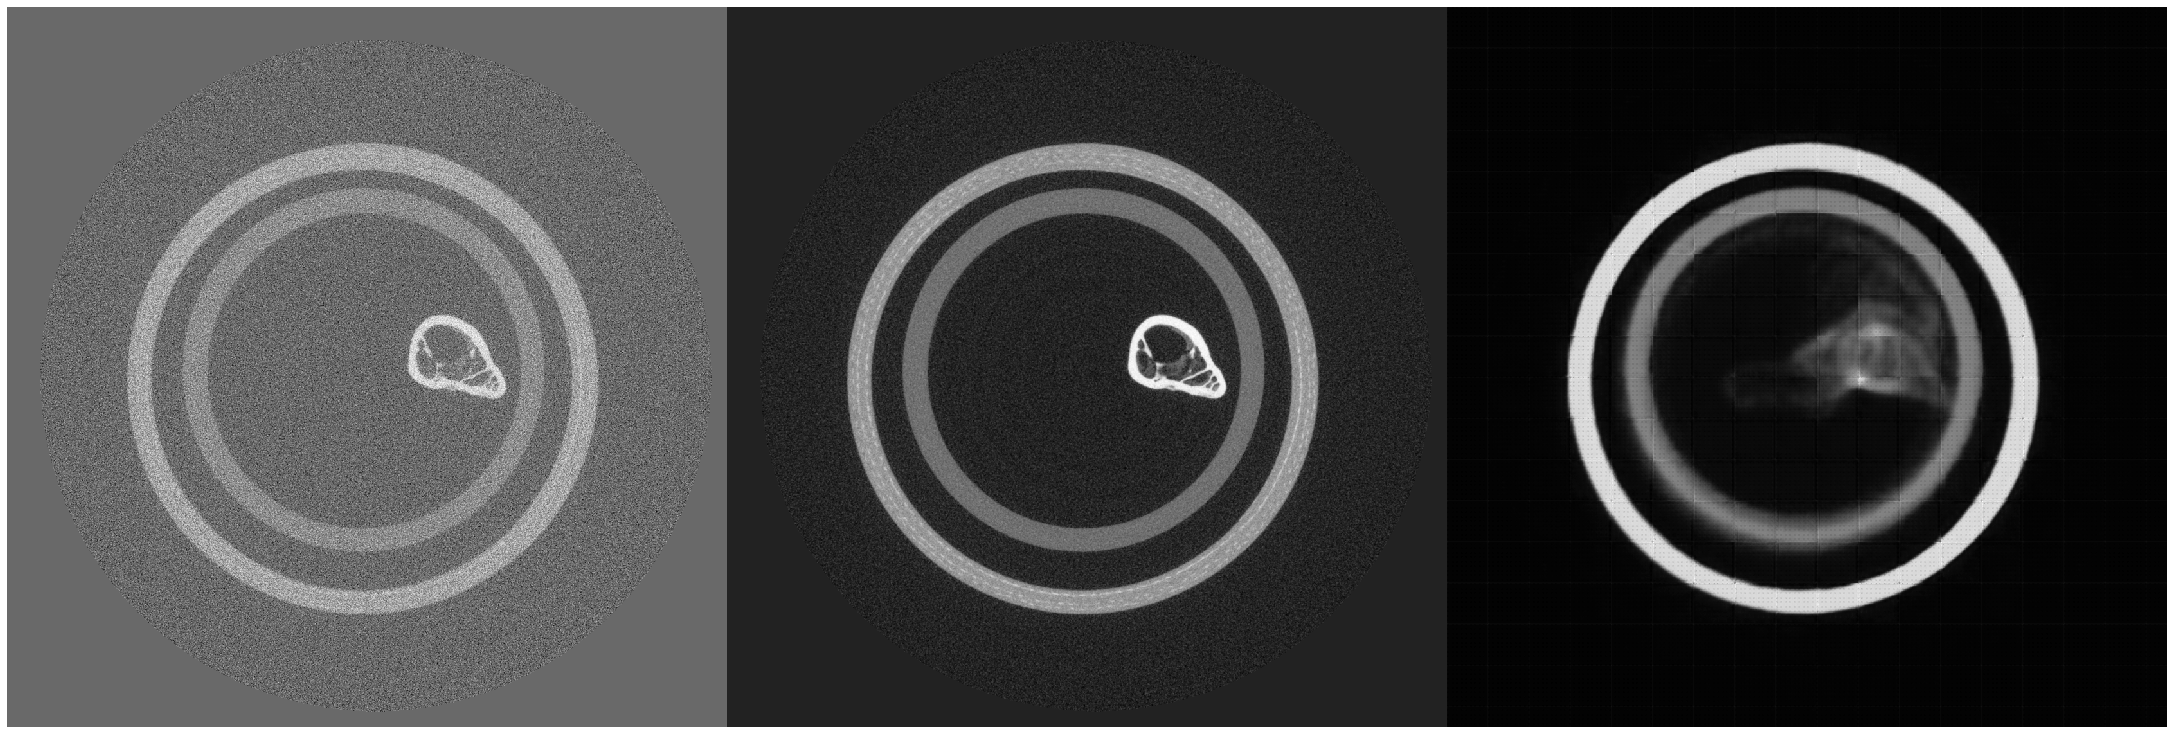

In [13]:
index = 800
show_images([input_data[index,:,:], target_data[index,:,:], recon_data[index,:,:]], shape=(3, 1), figsize=(30, 20))

reconstruct whole dataset
---

In [8]:
diff_data = input_data - recon_data

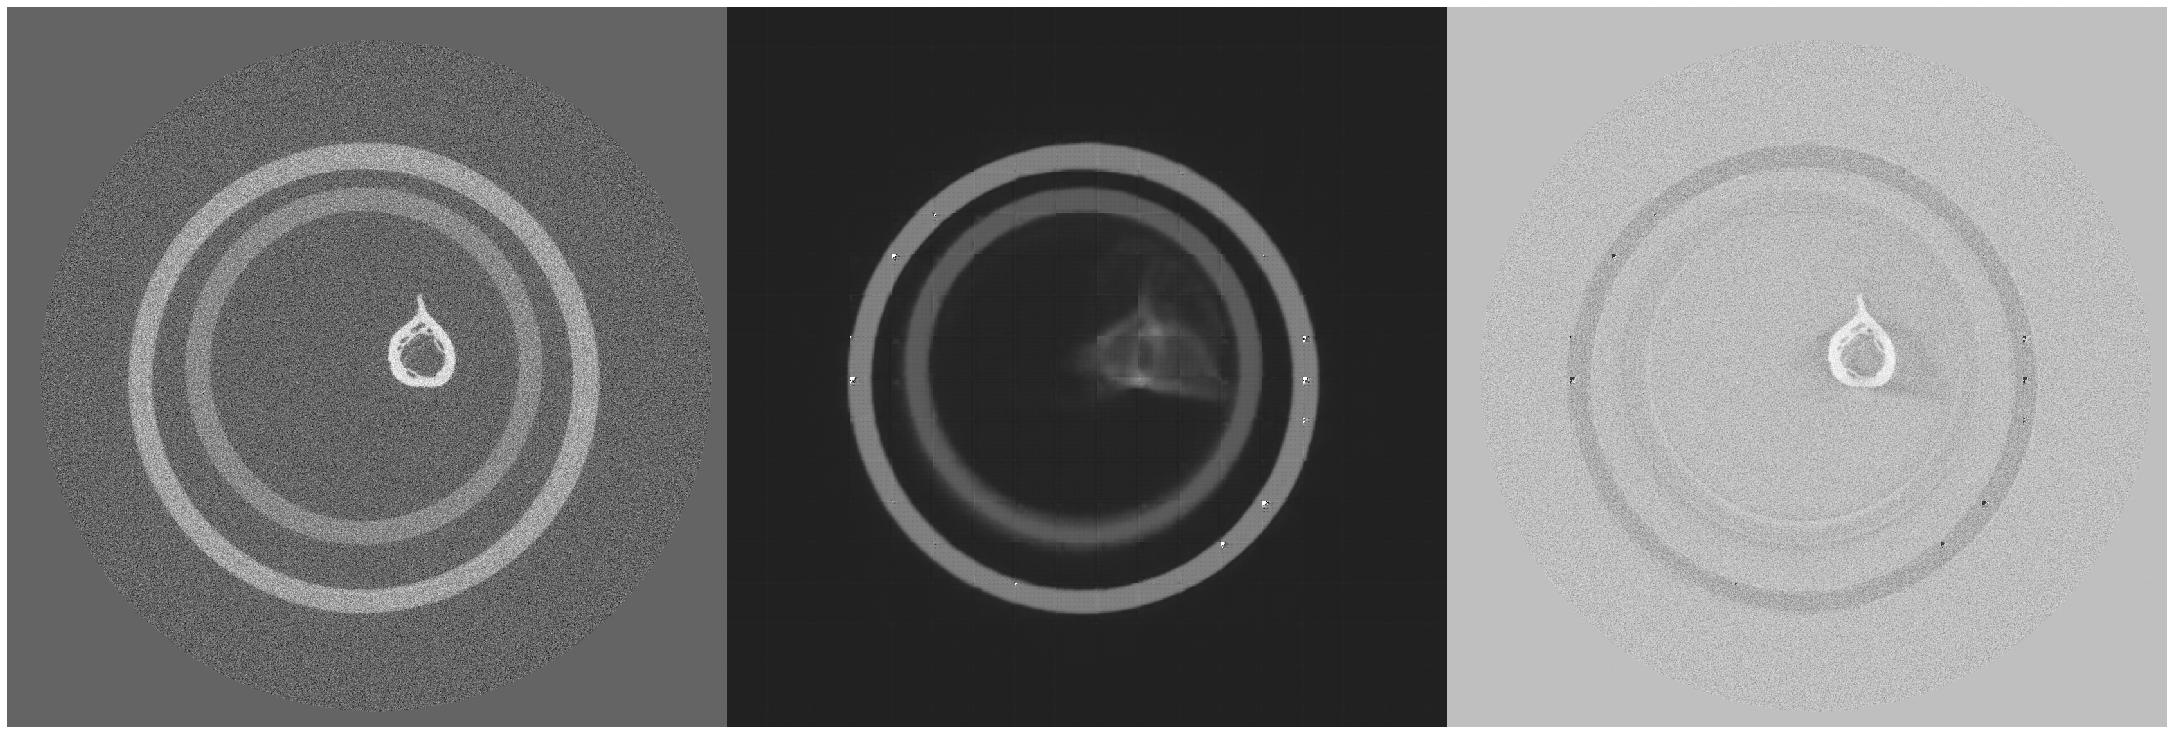

In [24]:
diff_show(input_data, recon_data, 900, (30, 20))

In [21]:
print('------input---------')
print(input_bin_data.min(), input_bin_data.max(), input_bin_data.mean(), input_bin_data.std() )
print('----recon-----------')
print(recon_dataset.min(), recon_dataset.max(), recon_dataset.mean(), recon_dataset.std() )

------input---------
0.0 1.0 0.4956137904788027 0.2546062404067355
----recon-----------
0.0 0.9449141621589661 0.4694722748812935 0.27602419666655703


In [25]:
# np.save(config.deepspace.recon_file, recon_dataset)
np.save('/mnt/data/anomaly/wp8/recon/cyl9_recon_ae3dn.npy', recon_dataset)

In [27]:
np.save('/mnt/data/anomaly/wp8/recon/cyl9_diff_ae3dn.npy', diff_dataset)

In [37]:
for index, each_slice in tqdm(enumerate(diff_dataset.transpose(2, 0, 1))):
    imwrite(Path('/home/zhihua/data/work_space/wp8/test/diff/cyl9_png/') / (str(index) + '.png'), each_slice)

[WARNING]: Lossy conversion from float64 to uint8. Range [-0.615992521085777, 0.9292179770550468]. Convert image to uint8 prior to saving to suppress this warning.
[WARNING]: Lossy conversion from float64 to uint8. Range [-0.6102601861119776, 0.9132196610883065]. Convert image to uint8 prior to saving to suppress this warning.
[WARNING]: Lossy conversion from float64 to uint8. Range [-0.6312412397529319, 0.9145703960986563]. Convert image to uint8 prior to saving to suppress this warning.
[WARNING]: Lossy conversion from float64 to uint8. Range [-0.625527116726044, 0.9152896186366347]. Convert image to uint8 prior to saving to suppress this warning.
[WARNING]: Lossy conversion from float64 to uint8. Range [-0.5898823166957543, 0.9104480230151212]. Convert image to uint8 prior to saving to suppress this warning.
[WARNING]: Lossy conversion from float64 to uint8. Range [-0.6360655445109517, 0.9333754341648247]. Convert image to uint8 prior to saving to suppress this warning.
[WARNING]: L

In [32]:
enumerate?

Init signature: enumerate(iterable, start=0)
Docstring:     
Return an enumerate object.

  iterable
    an object supporting iteration

The enumerate object yields pairs containing a count (from start, which
defaults to zero) and a value yielded by the iterable argument.

enumerate is useful for obtaining an indexed list:
    (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
Type:           type
Subclasses:     
